# Linear Regression Project

## From Pierian Data's Python for Data Science and Machine Learning Boot Camp

An Ecommerce company is trying to decide whether to focus their efforts on their mobile app experience or their website. This project uses basic data explorlation and linear regression to answer their question and provide further insight.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Loading and initial assessment of the dataset

Data columns, data types, and basic statistics.

In [3]:
# Load and checkout first few rows:
ec = pd.read_csv('./data/Ecommerce Customers')
ec.head(5)

,Email,Address,Avatar,Avg. Session Length,Avg. Time on App,Avg. Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
# Overview of data set contents and data types:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Avg. Time on App      500 non-null    float64
 5   Avg. Time on Website  500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
# Basic statistics
ec.describe()

,Avg. Session Length,Avg. Time on App,Avg. Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory data analysis

**First look at pair-wise cross correlations and trends between variables.**

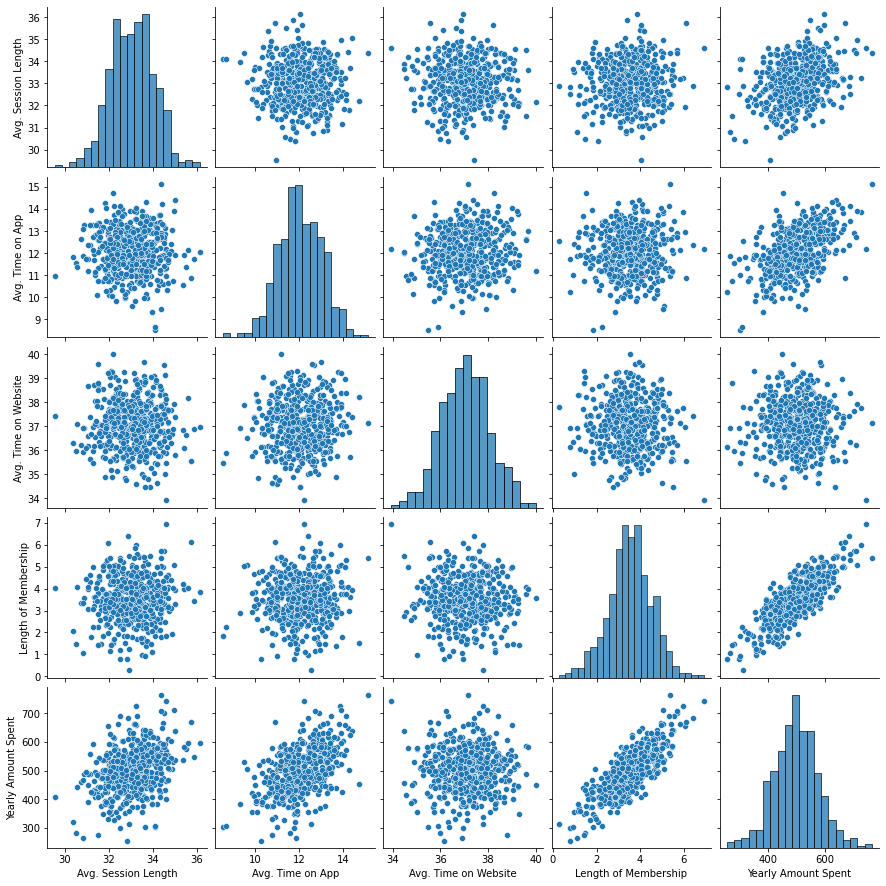

In [6]:
# Visual overview of pair-wise relationships:
sns.pairplot(ec)

<AxesSubplot:>

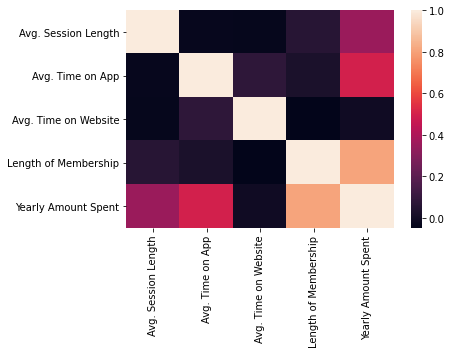

In [7]:
# Overview of pair-wise relationships via cross-correlation:
sns.heatmap(ec.corr())

**Assessment:** Yearly Amount Spent is most correlated with Length of Membership. Yearly Amount Spent is correlated to a lesser degree with Time on App and Average Session length. The remaining pair-wise relationships show lower to no correlation.

**Brief comparison of Time on App vs. Time on Website and their relationships with Yearly Amount Spent**

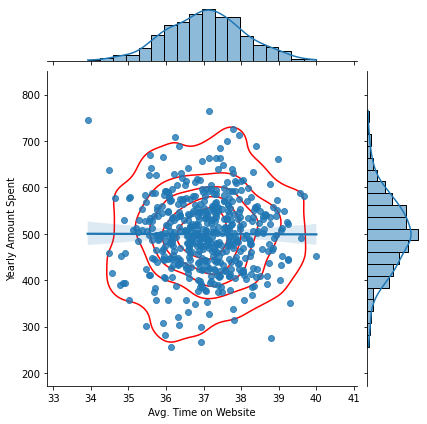

In [8]:
jp1 = sns.jointplot(data=ec, x='Avg. Time on Website', y='Yearly Amount Spent', kind='reg')
jp1.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)

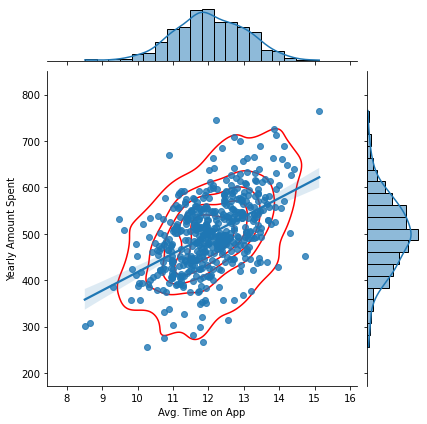

In [9]:
jp2 = sns.jointplot(data=ec, x='Avg. Time on App', y='Yearly Amount Spent', kind='reg')
jp2.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)

**Assessment:** Yearly Amount Spent is more correlated with Time on App than Time on Website. In fact, it looks like there is negligible dependence of Yearly Amount Spent on Time on Website.

## Linear regression

**Regress Yearly Amount Spent onto the other (numerical) variables in the Ecommerce dataset.**

Split the data into training (70%) and test (30%) groups.

In [10]:
from sklearn.model_selection import train_test_split
X = ec[['Avg. Session Length', 'Avg. Time on App', 'Avg. Time on Website', 'Length of Membership']] # 'independent' vars
y = ec['Yearly Amount Spent'] # 'dependent' var
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Train a linear model on the training data.

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Model assessment

Use the model to predict Yearly Amount Spent for the test data:

In [12]:
y_pred = lm.predict(X_test)

Quick plot of predictions vs. actual values

Text(0, 0.5, 'Predicted Yearly Amount Spent')

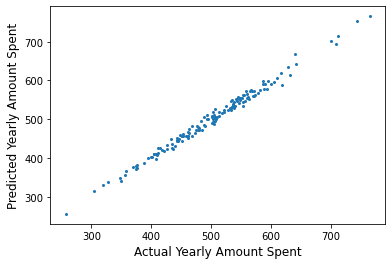

In [13]:
plt.scatter(y_test, y_pred, s=4)
plt.xlabel('Actual Yearly Amount Spent', fontsize=12)
plt.ylabel('Predicted Yearly Amount Spent', fontsize=12)

Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.

In [14]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred) # mean absolute error.
mse = metrics.mean_squared_error(y_test, y_pred) # mean squared error.
rmse = (mse)**0.5 # root-mean-squared error.
print("MAE: %0.2f \n" % mae + "MSE: %0.2f \n" % mse + "RMSE: %0.2f" % rmse)

MAE: 7.23 
MSE: 79.81 
RMSE: 8.93


Histogram of the residuals

Text(0.5, 6.79999999999999, 'Model residuals')

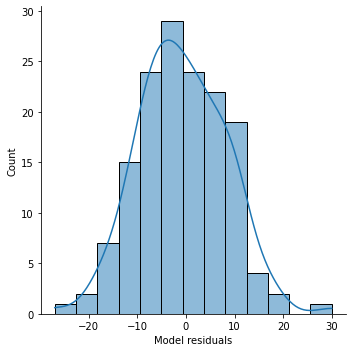

In [15]:
sns.displot(y_test - y_pred, kde=True, bins='fd')
plt.xlabel("Model residuals")

**Assessment:** There is a tight and linear relationship between predicted and actual Yearly Amount Spent, with average model residuals of 1.5 - 3 \% (using the RMSE). The residuals are roughly normally distributed and the slight skew could be simply random chance. Further, the peak of the residuals distribution is offset less than 5 from 0 (units haven't been provided with the dataset), which is only ~1 \% of typical Yearly Amount Spent values.

**Conclusion:** A linear model is appropriate for this dataset and predicts outcomes typically within 1 - 3\%.

## Model interpretation

Linear regression coefficients

In [16]:
coef_df = pd.DataFrame(np.append(lm.intercept_, lm.coef_), index=np.append(['Intercept'], X.columns), columns=['Coefficient'])
coef_df

,Coefficient
Intercept,-1047.932782
Avg. Session Length,25.981550
Avg. Time on App,38.590159
Avg. Time on Website,0.190405
Length of Membership,61.279097


Since this is a linear model, the coefficients represent the increase in yearly amount spent per unit increase for the respective variable. Unfortunately, units have not been provided with the dataset, so we summarize the results as:

For each unit increase of user membership length, their yearly amount spent increases by 61 units on average.

For each unit increase of app use, their yearly amount spent increases by 38 units on average.

For each unit increase of average session length, their yearly amount spent increases by 25 units on average.

For each unit increase of website use, their yearly amount spent increases by less than 1 unit which is likely not statistically significant.

The company was interested specifically in whether efforts should be focused on app or website experience. **It is clear from this analysis that efforts should be focused on the app experience, as increased time on the app leads to more spending while increased time on the website does not**. Further, the typical time on the app is only a little over 10 units while it is around 30 units for the website. Therefore, it might be comparitively easier to increase average app time. 

The company should also note that membership length and average session length have an impact on amount spent. In fact, **membership length has the largest impact on yearly amount spent, so retaining customers is important**. Increasing time on the app will also increase average session length, so working on app experience should likely address both these metrics.

This simple project, following the boot camp lectures, does not explore the statistical significance of each linear coefficient. However, given that (1) we are using a linear model with only a few input variables, and (2) the exploratory pair-wise analysis shows little correlation between pairs of input variables, it is safe to assume our model interpretation is valid.